Prandtl Elliptical Lift-distribution through Twist Calculator --PEL-TC-- is a tool which can be used in parallel with XFLR5 to creat a wing which approximates an elliptical lift distribution through twisting cross-sections

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Wing Definitions
chord = 0.267
span = 1.5
velocity = 20
kinVisc = 1.460E-5

#Reynolds approximation
Re = velocity*chord/kinVisc
print("Reynolds #: ",Re)

Reynolds #:  365753.4246575342


The txt file analysed is the output file of an XFLR direct foil analysis run at the specified reynolds number for the previous cell, with the headings removed. In the results, there should not be any CL value for which there are more than one alpha values. In other words, the range of the analysis should not be up to any further point than the stall point.

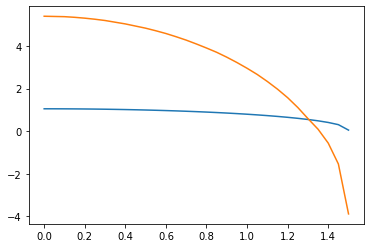

In [9]:
cols = ['alpha','CL','CD','CDp','Cm','Top Xtr','Bot Xtr','Cpmin','Chinge','XCp']
foilData = pd.read_fwf('T1_Re0.366_M0.06_N9.0_edited.txt',header=None,widths=[10,9,10,10,8,7,10,9,9,9],
                       names=cols) #Saves XFLR direct foil analysis output to pd dataframe    

CLmax = 1 #Max CL for elipse
CLoffset = 0.05 #Minimum CL value at wing tip, which can be played around with to counteract effect of induced drag
CLelipse = []
AlphaElipse = []
x = []
StepSize = 0.05 #distance between each cross-section, mainly limited by wingtip due to elipse gradient --> infinity
Steps = span/StepSize

#Eliptical CL distribution
for i in range(int(Steps)+1):
    x.append(StepSize*i)
    CLy = CLmax*(1-((i*StepSize)**2/(span**2)))**(1/2) + CLoffset
    CLelipse.append(CLy)
#print(CLelipse)
plt.plot(x,CLelipse)

#Coresponding Alpha
for i in range(int(Steps)+1):
    CLTemp = CLelipse[i]
    dCL = CLTemp
    count = 0
    for CL in foilData['CL']:
        dCLtemp = abs(CLTemp - CL)
        if dCLtemp < dCL:
            dCL = dCLtemp
            countStore = count
        count += 1
    AlphaElipse.append(foilData['alpha'][countStore])

plt.plot(x,AlphaElipse)
                   
                   
    



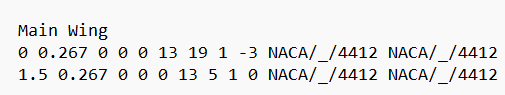
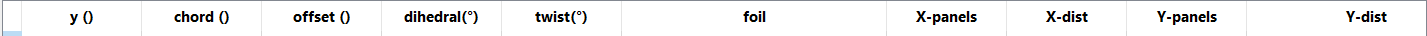

The first image is an example of saved wing data as .xwimp file, the table below it shows what piece of data each colunm represents. The xwimp file can then be loaded into XFLR through wing design --> import wing (depreciated, use XML)

In [10]:
wing = open("MainWingElipse.xwimp", "w")
wing.write("Main Wing"+'\n')


xpanels = 20
ypanels = 2
foil = 'NACA/_/4412'
for i in range(int(Steps)+1):
    ypos = StepSize*i
    twist = AlphaElipse[i]
    line = str(ypos)+" "+str(chord)+" "+str(0)+" "+str(0)+" "+str(AlphaElipse[i])+" "\
        +str(xpanels)+" "+str(ypanels)+" "+str(1)+" "+str(0)+" "+foil+" "+foil+'\n'
    wing.write(line)
    #print(line)
wing.close()  
    
    
